# X-Ray Flourescence
This notebook analyses the data from the X-Ray Flourscence and Moseley's law experimental lab.
The notebook is split into subsections:
1) Plotting the data as a histogram and finding the peaks of the binned data

2) Linear fit of peak positions vs energy --> both forcing 0 and without forcing 0 (residuals for this section are shown in the Excel speadsheet

3) Gaussian fitting function

4) Finding the calibration curve from the variable energy source ( and weak Am), including:
- Linear fir vs Quadratic fit
- F-test comparing weighted Chi-squared values for both fits

5) Moseley's Law analysis, includes both relativistic version of Moseley's law (to 1st order) and non-relativistic, the code also finds the values for the Rydberg energy using the exact literature energy values

Over all the notebook is used to determine the mean of the Gaussian's fitted on the binned data, the linear and quadratic calibration equations to determine the optimal calibration equation, and the value for the Rydberg energy and uncertainty from two variations of Moseley's law. 

## Importing

### Importing Modules

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import odr
import numpy as np

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Importing Data

In [3]:
# The data:
bin_data, count_data = np.loadtxt('Sample_8.txt').T

## Plotting as a Histogram

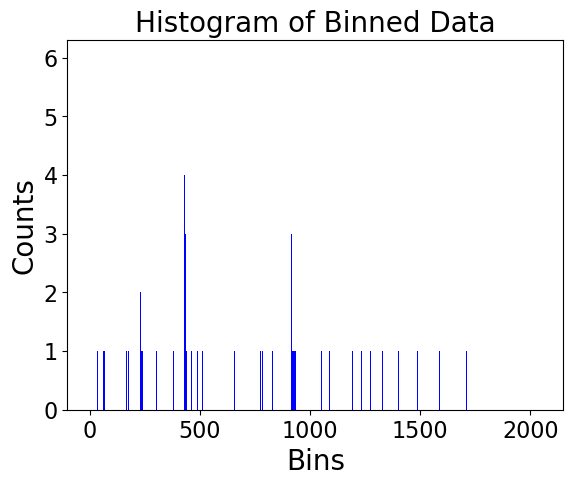

In [4]:
# Plot the histogram
plt.bar(bin_data, count_data, width=1, color='blue')  # Bar width is set to 1 for each bin
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Histogram of Binned Data')
plt.show()

### Finding Peaks of binned data

In [6]:
# Find peaks above 15 counts, width = 4, means that it find the peak over 4 bins
peaks, _ = find_peaks(count_data, width= 3, height=2)

# Print peak positions and the number of peaks
print("Peak Positions (Bin Numbers):", bin_data[peaks])
print("Number of Peaks:", len(peaks))

Peak Positions (Bin Numbers): [431.]
Number of Peaks: 1


## Line Fitting to Peak Positions vs Energy

In [12]:
energy_data = np.array([13.81, 13.81, 13.81, 17.7, 17.7, 17.7, 20.7, 20.7, 20.7, 26.34, 26.34])
peak_bin_data = np.array([399, 399, 399, 507, 506, 507, 594, 596, 590, 746, 750])

### Without Forcing Through 0

In [13]:
def my_function(grad, energy, c):
    return grad*energy + c

answer = curve_fit(my_function, 
                   energy_data, 
                   peak_bin_data, 
                   p0=[20.0, 0.0],
                  sigma= None,
                  absolute_sigma=True)

In [14]:
my_grad = answer[0][0]
my_sigma_grad = np.sqrt(np.diag(answer[1])[0])
my_c = answer[0][1]
my_sigma_c = np.sqrt(np.diag(answer[1])[1])

print("My fitted value of the gradient is:", my_grad)
print("My fitted error on the gradient is:", my_sigma_grad)
print("My fitted value of the y-intercept is:", my_c)
print("My fitted error on the y-intercept is:", my_sigma_c)

My fitted value of the gradient is: 27.926714244459404
My fitted error on the gradient is: 0.07030924445293284
My fitted value of the y-intercept is: 13.423585288178334
My fitted error on the y-intercept is: 1.3714117701368176


#### Plotting data

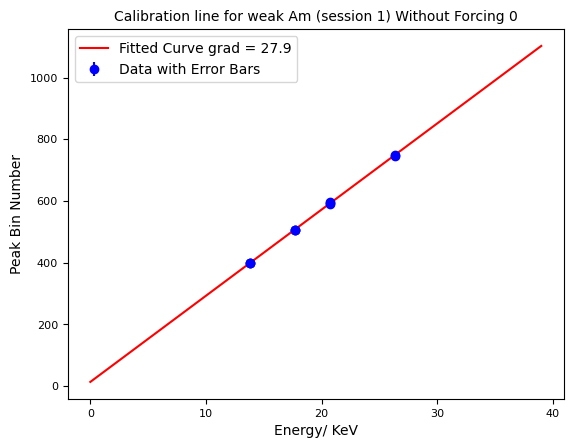

In [15]:
# Generate data for plotting the trendline
e_data = np.arange(0, 40, 1)
fitted_curve = my_function(e_data, my_grad, my_c)

# Plot the data and the trendline
plt.errorbar(energy_data, peak_bin_data, yerr=1, fmt='bo', label='Data with Error Bars')
plt.plot(e_data, fitted_curve, 'r-', label='Fitted Curve grad = {:.1f}'.format(my_grad))
plt.xlabel('Energy/ KeV', fontsize=10)
plt.ylabel('Peak Bin Number', fontsize=10)
plt.title('Calibration line for weak Am (session 1) Without Forcing 0', fontsize=10)
plt.legend(fontsize=10)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

### Forcing Through 0

In [24]:
def my_function2(energy, grad):
    return grad * energy

answer2 = curve_fit(my_function2, 
                    energy_data, 
                    peak_bin_data, 
                    p0=[20.0],
                    sigma=None,
                    absolute_sigma=True)

In [25]:
my_grad2 = answer2[0][0]
my_sigma_grad2 = np.sqrt(np.diag(answer2[1])[0])

print("My fitted value of the gradient is:", my_grad2)
print("My fitted error on the gradient is:", my_sigma_grad2)

My fitted value of the gradient is: 28.598073226529284
My fitted error on the gradient is: 0.015457816362211722


#### Plotting Data

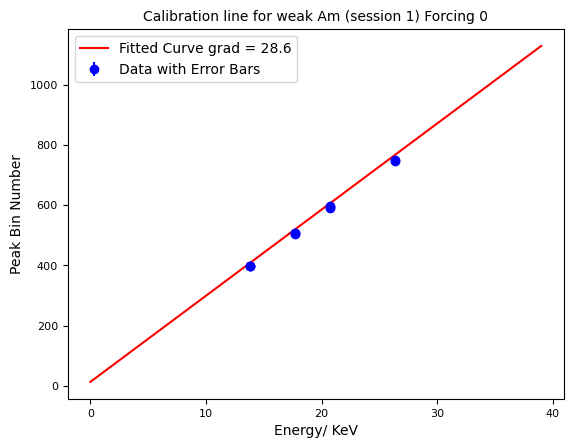

In [32]:
# Generate data for plotting the trendline
e_data = np.arange(0, 40, 1)
fitted_curve = my_function(e_data, my_grad2, my_c)

# Plot the data and the trendline
plt.errorbar(energy_data, peak_bin_data, yerr=1, fmt='bo', label='Data with Error Bars')
plt.plot(e_data, fitted_curve, 'r-', label='Fitted Curve grad = {:.1f}'.format(my_grad2))
plt.xlabel('Energy/ KeV', fontsize=10)
plt.ylabel('Peak Bin Number', fontsize=10)
plt.title('Calibration line for weak Am (session 1) Forcing 0', fontsize=10)
plt.legend(fontsize=10)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

## Fitting Gaussians to peaks

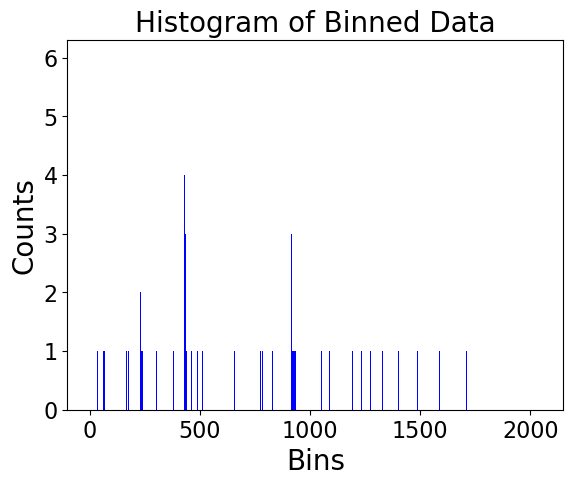

Gaussian 1: Amplitude = 2.6836882311959136, Center = 233.43107407313383 ± 0.48691008099692307, Width = 2.5222403715195107
Gaussian 2: Amplitude = 3.9791055817808805, Center = 432.08516966486684 ± 0.18395447207274582, Width = 2.564279602476241
Gaussian 3: Amplitude = 1.0770511761307906, Center = 927.3844545616355 ± 1.4504108395801174, Width = 6.422430784748398


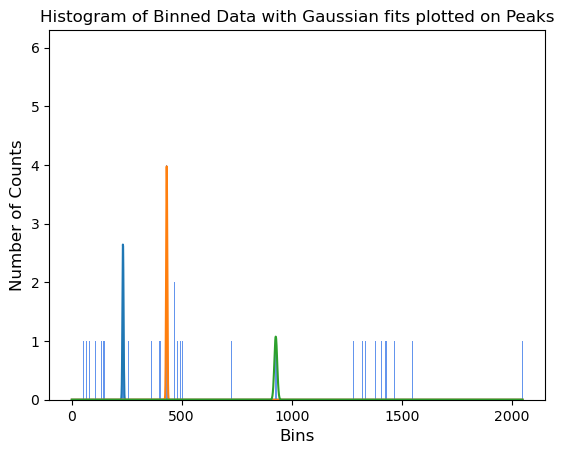

In [26]:
# Load the data
bin_data, count_data = np.loadtxt('Sample_8.txt').T

# Plot the histogram
plt.bar(bin_data, count_data, width=1, color='blue')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Histogram of Binned Data')
plt.show()

# Find peaks above (adjust height and width as needed)
peaks, _ = find_peaks(count_data, width=1.75, height=2)

# Define a Gaussian function
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

def fit_gaussian_around_peak(bin_data, count_data, peak_indices, window_size=20):
    fitted_params = []
    center_errors = []  # New list to store errors on center
    for peak_index in peak_indices:
        start = max(0, peak_index - window_size)
        end = min(len(bin_data), peak_index + window_size + 1)
        peak_bins = bin_data[start:end]
        peak_counts = count_data[start:end]
        initial_guess = (np.max(peak_counts), bin_data[peak_index], 1.0)
        popt, pcov = curve_fit(gaussian, peak_bins, peak_counts, p0=initial_guess)
        fitted_params.append(popt)
        center_errors.append(np.sqrt(np.diag(pcov))[1])  # Error on center
    return fitted_params, center_errors  # Return fitted parameters and center errors

# Fit Gaussian around each peak
fitted_params, center_errors = fit_gaussian_around_peak(bin_data, count_data, peaks)

# Print the parameters and errors of the fitted Gaussians
for i, (params, error) in enumerate(zip(fitted_params, center_errors)):
    print(f"Gaussian {i+1}: Amplitude = {params[0]}, Center = {params[1]} ± {error}, Width = {params[2]}")

# Plot the histogram
plt.bar(bin_data, count_data, width=1, color='cornflowerblue', label='Histogram')
plt.xlabel('Bins', fontsize=12)
plt.ylabel('Number of Counts', fontsize=12)
plt.title('Histogram of Binned Data with Gaussian fits plotted on Peaks', fontsize=12)

# Plot the fitted Gaussians
for i, peak_index in enumerate(peaks):
    fitted_peak = gaussian(bin_data, *fitted_params[i])
    plt.plot(bin_data, fitted_peak, label=f'Gaussian {i+1}')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()





## Fitting Peak Positions vs Energy (using gaussian position values)

In [2]:
energy_datag = [13.81, 13.81, 13.81, 17.7, 17.7, 17.7, 20.7, 20.7, 20.7]
#peak_bin_datag = [403.972027828611, 403.414420121903, 513.427720162631, 513.217063280093, 600.427110689528]
peak_bin_datag = [398.1628382, 397.9326102, 397.9421661, 506.0439427, 505.6891413, 505.9027422, 592.5516402, 592.4064389, 593.0153447]
sigma_1 = np.ones_like(peak_bin_datag)



My fitted value of the gradient is: 28.225195229432742
My fitted error on the gradient is: 0.11817626117049881
My fitted value of the y-intercept is: 7.637170530623456
My fitted error on the y-intercept is: 2.0834979479613276


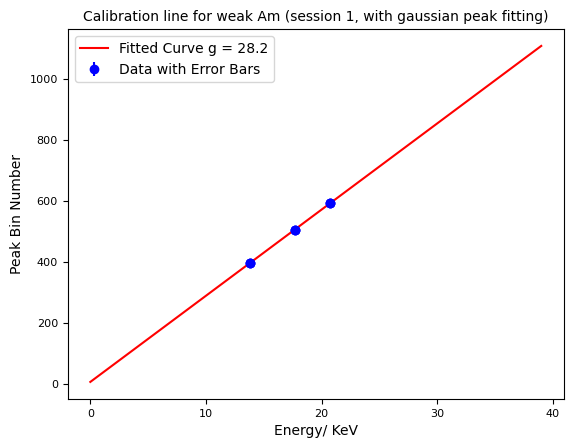

In [3]:
def my_function(grad, energy, c):
    return grad*energy + c

answer = curve_fit(my_function, 
                   energy_datag, 
                   peak_bin_datag, 
                   p0=[20.0, 0.0],
                  sigma= sigma_1,
                  absolute_sigma=True)
my_grad = answer[0][0]
my_sigma_grad = np.sqrt(np.diag(answer[1])[0])
my_c = answer[0][1]
my_sigma_c = np.sqrt(np.diag(answer[1])[1])

print("My fitted value of the gradient is:", my_grad)
print("My fitted error on the gradient is:", my_sigma_grad)
print("My fitted value of the y-intercept is:", my_c)
print("My fitted error on the y-intercept is:", my_sigma_c)

# Generate data for plotting the trendline
e_data = np.arange(0, 40, 1)
fitted_curve = my_function(e_data, my_grad, my_c)

# Plot the data and the trendline
plt.errorbar(energy_datag, peak_bin_datag, yerr=1, fmt='bo', label='Data with Error Bars')
plt.plot(e_data, fitted_curve, 'r-', label='Fitted Curve g = {:.1f}'.format(my_grad))
plt.xlabel('Energy/ KeV', fontsize=10)
plt.ylabel('Peak Bin Number', fontsize=10)
plt.title('Calibration line for weak Am (session 1, with gaussian peak fitting)', fontsize=10)
plt.legend(fontsize=10)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.show()

### Finding Calibration Curve from Variable Energy Source (and weak Am)
With Tb removed

In [24]:
energy_datac = np.array([13.81, 13.81, 17.7, 17.7, 20.7, 22.163, 24.943, 32.194, 36.378, 8.048,
8.905, 13.395, 14.961, 17.479, 19.606, 13.395, 14.961, 32.194, 36.378])
peak_bin_datac = np.array([403.972027828611, 403.414420121903, 513.427720162631, 513.217063280093, 600.427110689528, 638.9331042, 720.2648125,
926.8357037, 1049.751944, 233.5938656, 258.6490363, 387.397862, 433.08645, 504.7237579, 566.8723817, 387.2979676, 433.2641757, 926.7397723, 1049.523822])
sigma_1 = np.ones_like(peak_bin_datac)

#### Linear Fit

My fitted value of the gradient is: 28.716736303231578
My fitted error on the gradient is: 0.027105491172590895
My fitted value of the y-intercept is: 3.988980304960727
My fitted error on the y-intercept is: 0.5869736395519731


/tmp/ipykernel_141/3932706235.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(energy_datac, peak_bin_datac, yerr=1, fmt = 'bo', color='black', label='Data with Error Bars')


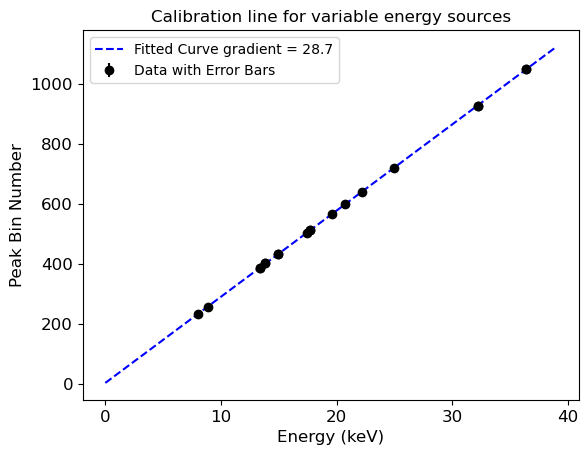

In [26]:
def my_function(grad, energy, c):
    return grad*energy + c

answer = curve_fit(my_function, 
                   energy_datac, 
                   peak_bin_datac, 
                   p0=[20.0, 0.0],
                  sigma= sigma_1,
                  absolute_sigma=True)
my_grad = answer[0][0]
my_sigma_grad = np.sqrt(np.diag(answer[1])[0])
my_c = answer[0][1]
my_sigma_c = np.sqrt(np.diag(answer[1])[1])

print("My fitted value of the gradient is:", my_grad)
print("My fitted error on the gradient is:", my_sigma_grad)
print("My fitted value of the y-intercept is:", my_c)
print("My fitted error on the y-intercept is:", my_sigma_c)

# Generate data for plotting the trendline
e_data = np.arange(0, 40, 1)
fitted_curve = my_function(e_data, my_grad, my_c)

# Plot the data and the trendline
plt.errorbar(energy_datac, peak_bin_datac, yerr=1, fmt = 'bo', color='black', label='Data with Error Bars')
plt.plot(e_data, fitted_curve, 'b--', label='Fitted Curve gradient = {:.1f}'.format(my_grad))
plt.xlabel('Energy (keV)', fontsize=12)
plt.ylabel('Peak Bin Number', fontsize=12)
plt.title('Calibration line for variable energy sources', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

#### Residuals

/tmp/ipykernel_141/3285537885.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(energy_datac, residuals, yerr=1, fmt='ko', color = 'black')


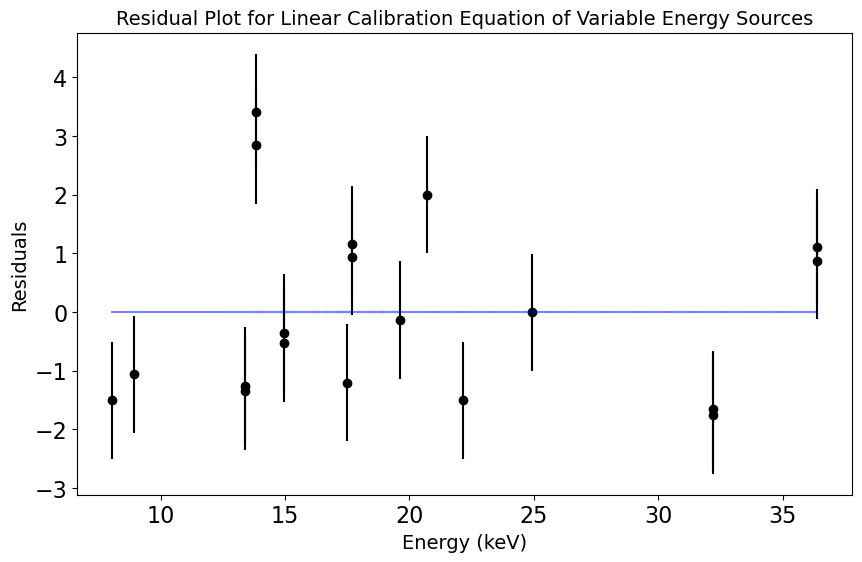

In [27]:
en_data = np.arange(0, 40, 1)
fitted_points = my_function(energy_datac, my_grad, my_c)
residuals = peak_bin_datac - fitted_points

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))

# Plot the residuals with error bars of +-1
plt.errorbar(energy_datac, residuals, yerr=1, fmt='ko', color = 'black')
plt.errorbar(energy_datac, np.zeros(energy_datac.shape), yerr=0, linestyle='--', color='blue', alpha=0.5)


plt.xlabel('Energy (keV)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot for Linear Calibration Equation of Variable Energy Sources', fontsize=14)
plt.show()



#### Quadratic Fit

Fitted values:
a = -0.0025962627435009347
b = 28.836258294105075
c = 2.824098561465615
Errors:
Error in a = 0.003423435014157933
Error in b = 0.15991525413906243
Error in c = 1.6443380513117154


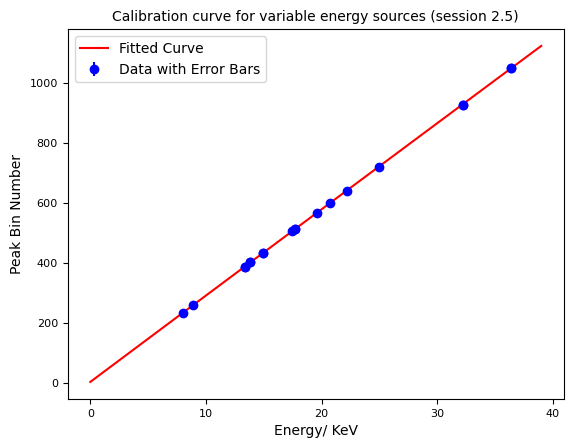

In [11]:
# Define quadratic function
def my_function_quadratic(energy, a, b, c):
    return a * energy ** 2 + b * energy + c

# Fit the quadratic function
answer = curve_fit(my_function_quadratic, 
                   energy_datac, 
                   peak_bin_datac, 
                   p0=[1.0, 1.0, 1.0],  # Initial guess for parameters a, b, c
                   sigma=sigma_1,
                   absolute_sigma=True)

# Extract fitted parameters and errors
a, b, c = answer[0]
a_error, b_error, c_error = np.sqrt(np.diag(answer[1]))

# Print fitted parameters and errors
print("Fitted values:")
print("a =", a)
print("b =", b)
print("c =", c)
print("Errors:")
print("Error in a =", a_error)
print("Error in b =", b_error)
print("Error in c =", c_error)

# Generate data for plotting the trendline
e_data = np.arange(0, 40, 1)
fitted_curve = my_function_quadratic(e_data, a, b, c)

# Plot the data and the trendline
plt.errorbar(energy_datac, peak_bin_datac, yerr=1, fmt='bo', label='Data with Error Bars')
plt.plot(e_data, fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Energy/ KeV', fontsize=10)
plt.ylabel('Peak Bin Number', fontsize=10)
plt.title('Calibration curve for variable energy sources (session 2.5)', fontsize=10)
plt.legend(fontsize=10)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.show()

#### Residuals

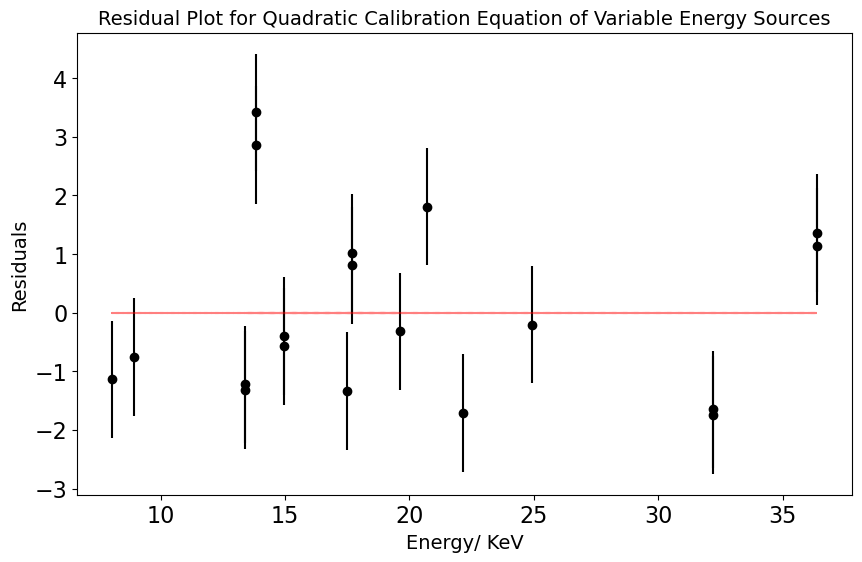

In [12]:
fitted_points = my_function_quadratic(energy_datac, a, b, c)
residuals = peak_bin_datac - fitted_points

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))

# Plot the residuals with error bars of +-1
plt.errorbar(energy_datac, residuals, yerr=1, fmt='ko')
plt.errorbar(energy_datac, np.zeros(energy_datac.shape), yerr=0, fmt='r--', alpha=0.5)


plt.xlabel('Energy/ KeV', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot for Quadratic Calibration Equation of Variable Energy Sources', fontsize=14)
plt.show()



### Comparing Models- F test

#### Chi Squared values

In [15]:
def chi_squared(xi, xt):
    return ((xi-xt)**2)/xt

In [16]:
peak_bin_datac = np.array(peak_bin_datac)
energy_datac = np.array(energy_datac)

x_i = peak_bin_datac
x_t = (-0.0025962627435009347 * (energy_datac)**2) + (28.836258294105075 * (energy_datac)) + 2.824098561465615

chi_squared_value = 0
for j in range(len(peak_bin_datac)):
    chi_squared_value += chi_squared(x_i[j], x_t[j])

print(chi_squared_value)
print(chi_squared_value/16)
    

0.09292515871380018
0.005807822419612511


In [17]:
peak_bin_datac = np.array(peak_bin_datac) 
energy_datac = np.array(energy_datac)

x_i = peak_bin_datac
x_t = (28.716736303231578 * energy_datac) + 3.988980304960727

chi_squared_value2 = 0
for j in range(len(peak_bin_datac)):
    chi_squared_value2 += chi_squared(x_i[j], x_t[j])

print(chi_squared_value2)
print(chi_squared_value2/17)

0.09852246392809304
0.005795439054593708


#### F-test

In [18]:
F_value = (chi_squared_value/ 16)/(chi_squared_value2/17)
print(F_value)
# Hence since value returned is >1 then the model favours model 2

1.0021367432048116


## Mosley's Law

### Kalpha and Kbeta data

In [5]:

# Kalpha
E_alpha1 = np.array([22.0836668, 32.19475224, 7.848228543, 13.24979613, 17.37025965, 13.24628786, 32.19138315]) #Experimentally determined
#E_alpha1 = np.array([22.163, 32.194, 8.048, 13.395, 17.479, 13.395, 32.194]) #Literature values
#E_alpha1 = np.array([8.048, 13.395, 17.479, 22.163, 32.194, 38.725, 42.996, 49.128, 55.790, 63.000, 70.818]) #Literature values (larger range)
E_alpha = np.sort(E_alpha1)
Z_values1 = np.array([47, 56, 29, 37, 42, 37, 56])
#Z_values1 = np.array([29, 37, 42, 47, 56, 61, 64, 68, 72, 76, 80])
Z_values = np.sort(Z_values1)
E_alpha_sigma1 = [0.035119813, 0.035119813, 0.035119813, 0.035119813, 0.035119813, 0.035119813, 0.035119813]
E_alpha_sigma = np.sort(E_alpha_sigma1)

# Kbeta
E_beta1 =np.array([24.94002118, 36.51154762, 8.728161451, 14.85437079, 19.5529077, 14.86061249, 36.50353603]) #Experimentally determined
#E_beta1 = np.array([24.943, 36.378, 8.905, 14.961, 19.606, 14.961, 36.378]) #Literature values
#E_beta1 = np.array([8.905, 14.961, 19.606, 24.943, 36.378, 43.827, 48.695, 55.674, 63.243, 71.414, 80.255]) #Literature values (larger range)
E_beta = np.sort(E_beta1)
E_beta_sigma1 = [0.035119813, 0.035119813, 0.035119813, 0.035119813, 0.035119813, 0.035119813, 0.035119813]
E_beta_sigma = np.sort(E_beta_sigma1)

### Mosley's Law Fitting

In [6]:
from scipy.odr import Model, RealData, ODR

def mosley_law(params, z):
    m, b = params
    return (m*(3/4))*((z + b)**2)

# Defining model and data for K Alpha
odr_model = Model(mosley_law)
odr_data = RealData(Z_values, E_alpha, sy=E_alpha_sigma)
# Running model
odr_instance = ODR(odr_data, odr_model, beta0=[0.10, 0.0])
out = odr_instance.run()

# Extracting the parameters and their errors for K Alpha
my_odr_m, my_odr_b = out.beta
my_odr_sigma_m, my_odr_sigma_b = out.sd_beta

# Printing the values for K Alpha
print("K Alpha:")
print("My ODR fitted value of m (gradient) is {:.10f} +- {:.10f}".format(my_odr_m, my_odr_sigma_m))
print("My ODR fitted value of b (y-intercept) is {:.10f} +- {:.10f}".format(my_odr_b, my_odr_sigma_b))

def mosley_law2(params, z):
    m, b = params
    return (m*(8/9))*((z + b)**2)

# Defining model and data for K Beta
odr_model2 = Model(mosley_law2)
odr_data2 = RealData(Z_values, E_beta, sy=E_beta_sigma)
# Running model
odr_instance2 = ODR(odr_data2, odr_model2, beta0=[0.10, 0.0])
out2 = odr_instance2.run()

# Extracting the parameters and their errors for K Beta
my_odr_m2, my_odr_b2 = out2.beta
my_odr_sigma_m2, my_odr_sigma_b2 = out2.sd_beta

# Printing the values for K Beta
print("K Beta:")
print("My ODR fitted value of m (gradient) is {:.10f} +- {:.10f}".format(my_odr_m2, my_odr_sigma_m2))
print("My ODR fitted value of b (y-intercept) is {:.10f} +- {:.10f}".format(my_odr_b2, my_odr_sigma_b2))


K Alpha:
My ODR fitted value of m (gradient) is 0.0151504575 +- 0.0000979205
My ODR fitted value of b (y-intercept) is -2.8270429817 +- 0.1347191410
K Beta:
My ODR fitted value of m (gradient) is 0.0147773804 +- 0.0001004527
My ODR fitted value of b (y-intercept) is -3.3378533529 +- 0.1399959817


### Plotting Data and Residuals

#### Plotting Data

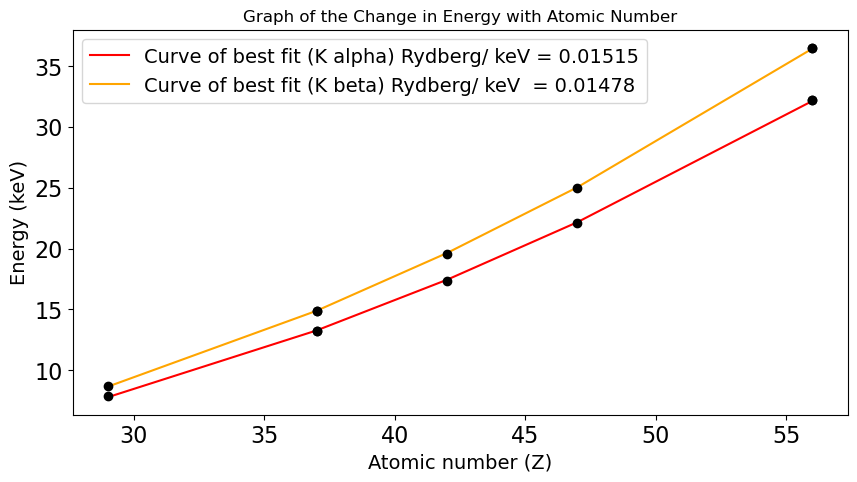

In [30]:
fig = plt.figure(figsize=(10,5)) 

# Plotting data and lines
plt.errorbar(Z_values, E_alpha, yerr=E_alpha_sigma, linestyle='None', marker='o', color='black')
plt.errorbar(Z_values, E_beta, yerr=E_beta_sigma, linestyle='None', marker='o', color='black')
plt.plot(Z_values, mosley_law(out.beta, Z_values), label='Curve of best fit (K alpha) Rydberg/ keV = {:.5f}'.format(my_odr_m), color='red')
plt.plot(Z_values, mosley_law2(out2.beta, Z_values), label='Curve of best fit (K beta) Rydberg/ keV  = {:.5f}'.format(my_odr_m2), color='orange')

# Setting labels and title
plt.xlabel('Atomic number (Z)', fontsize=14)
plt.ylabel('Energy (keV)', fontsize=14)
plt.title('Graph of the Change in Energy with Atomic Number', fontsize=12)

# Adding legend
plt.legend()
plt.savefig('energy_vs_atomic_number.png')
plt.show()

#### Plotting Residuals

(Text(0.5, 0, 'Atomic Number (Z)'), Text(0, 0.5, 'Residuals of Fit (keV)'))

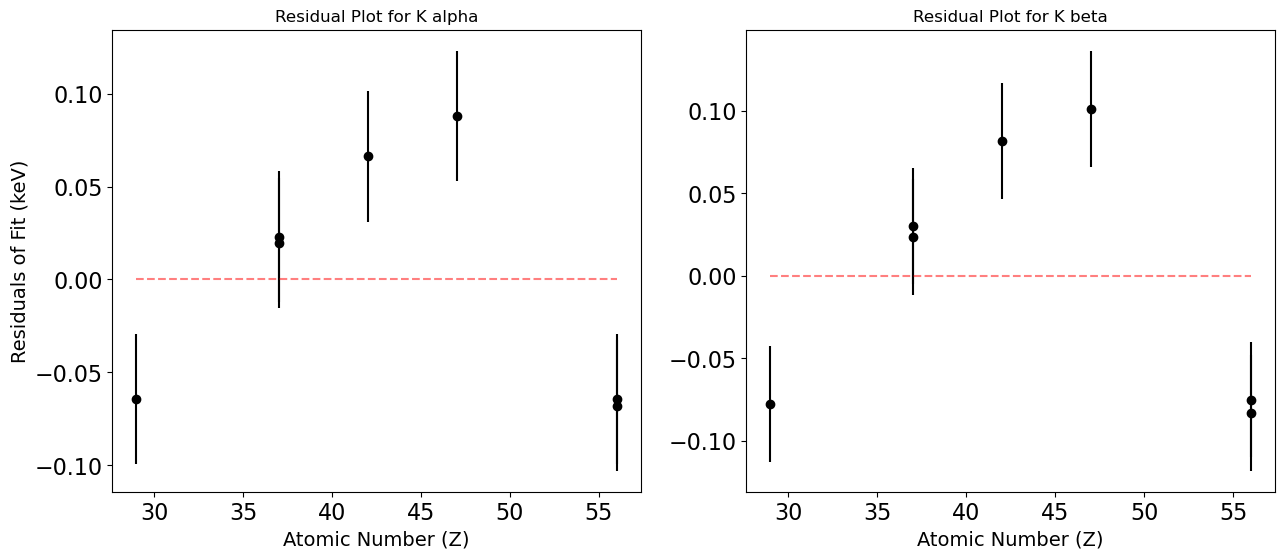

In [29]:
fig, (ax2, ax3) = plt.subplots(1,2, figsize=(15,6))
ax2.errorbar(Z_values, mosley_law(out.beta, Z_values)-E_alpha, 
             yerr=E_alpha_sigma, xerr=None, linestyle='None', marker='o', color='black', label='Actual Data'), ax2.set_title('Residual Plot for K alpha', fontsize =12 )
ax2.plot(Z_values, np.zeros(Z_values.shape), 'r--', alpha=0.5)
ax2.set_xlabel('Atomic Number (Z)', fontsize =14), ax2.set_ylabel('Residuals of Fit (KeV)', fontsize =14)

ax3.errorbar(Z_values, mosley_law2(out2.beta, Z_values)-E_beta, 
             yerr=E_beta_sigma, xerr=None, linestyle='None', marker='o', color='black', label='Actual Data'), ax3.set_title('Residual Plot for K beta', fontsize =12 )
ax3.plot(Z_values, np.zeros(Z_values.shape), 'r--', alpha=0.5)
ax3.set_xlabel('Atomic Number (Z)', fontsize =14), ax2.set_ylabel('Residuals of Fit (keV)', fontsize =14)

### Expected values (from literature and using literature energy values in Mosley's law equation)

In [9]:
# Expected hcR value--> Known as Rhydberg energy (h in KeV)
hcR = 4.135667696 * 10**(-18) * 299792458 * 10973731.568160
print("Rhydberg Energy:", hcR)


Rhydberg Energy: 0.013605693119954883


In [10]:
# For Kalpha transition (use E_alpha1 = [22.163, 32.194, 8.048, 13.395, 17.479, 13.395, 32.194])
odr_modelTrueA = Model(mosley_law)
odr_dataTrueA = RealData(Z_values, E_alpha)
# Running model
odr_instanceTrueA = ODR(odr_dataTrueA, odr_modelTrueA, beta0=[0.10, 0.0])
outTrueA = odr_instanceTrueA.run()
# Extracting the parameters and their errors for K Alpha
my_odr_m_TA, my_odr_b_TA = outTrueA.beta

# Printing the values for K Alpha for exact energies
print("K Alpha (from Exact energies):")
print("My ODR fitted value of m (gradient) is {:.10f}".format(my_odr_m_TA))
print("My ODR fitted value of b (y-intercept) is {:.10f}".format(my_odr_b_TA))

# For Kalpha transition (use E_beta1 = [24.943, 36.378, 8.905, 14.961, 19.606, 14.961, 36.378])
odr_modelTrueB = Model(mosley_law2)
odr_dataTrueB = RealData(Z_values, E_alpha)
# Running model
odr_instanceTrueB = ODR(odr_dataTrueB, odr_modelTrueB, beta0=[0.10, 0.0])
outTrueB = odr_instanceTrueB.run()
# Extracting the parameters and their errors for K Alpha
my_odr_m_TB, my_odr_b_TB = outTrueB.beta

# Printing the values for K Beta for exact energies
print("K Beta (from Exact energies):")
print("My ODR fitted value of m (gradient) is {:.10f}".format(my_odr_m_TB))
print("My ODR fitted value of b (y-intercept) is {:.10f}".format(my_odr_b_TB))

K Alpha (from Exact energies):
My ODR fitted value of m (gradient) is 0.0152020435
My ODR fitted value of b (y-intercept) is -2.9013994893
K Beta (from Exact energies):
My ODR fitted value of m (gradient) is 0.0128267238
My ODR fitted value of b (y-intercept) is -2.9013988048


### Moseley's Law fitting with Relativistic Terms

In [11]:
from scipy.odr import Model, RealData, ODR
def mosley_law_relativisticA(params, z):
    m, b = params
    return m*((3/4*((z-b)**2))+(15/64*(1/137.035999**2)*((z-b)**4)))

# Defining model and data for K Alpha
odr_modelA = Model(mosley_law_relativisticA)
odr_dataA = RealData(Z_values, E_alpha, sy=E_alpha_sigma)
# Running model
odr_instanceA = ODR(odr_dataA, odr_modelA, beta0=[0.10, 0.0])
outA = odr_instanceA.run()
# Extracting the parameters and their errors for K Alpha
my_odr_m_A, my_odr_b_A = outA.beta
my_odr_sigma_m_A, my_odr_sigma_b_A = outA.sd_beta

# Printing the values for K Alpha
print("K Alpha:")
print("My ODR fitted value of m (gradient) is {:.10f} +- {:.10f}".format(my_odr_m_A, my_odr_sigma_m_A))
print("My ODR fitted value of b (y-intercept) is {:.10f} +- {:.10f}".format(my_odr_b_A, my_odr_sigma_b_A))

def mosley_law_relativisticB(params, z):
    m, b = params
    return m*((8/9*((z-b)**2))+(13/54*(1/137.035999**2)*((z-b)**4)))

# Defining model and data for K Beta
odr_modelB = Model(mosley_law_relativisticB)
odr_dataB = RealData(Z_values, E_beta, sy=E_beta_sigma)
# Running model
odr_instanceB = ODR(odr_dataB, odr_modelB, beta0=[0.10, 0.0])
outB = odr_instanceB.run()

# Extracting the parameters and their errors for K Beta
my_odr_m_b, my_odr_b_b = outB.beta
my_odr_sigma_m_b, my_odr_sigma_b_b = outB.sd_beta

# Printing the values for K Beta
print("K Beta:")
print("My ODR fitted value of m (gradient) is {:.10f} +- {:.10f}".format(my_odr_m_b, my_odr_sigma_m_b))
print("My ODR fitted value of b (y-intercept) is {:.10f} +- {:.10f}".format(my_odr_b_b, my_odr_sigma_b_b))

K Alpha:
My ODR fitted value of m (gradient) is 0.0138735742 +- 0.0000116911
My ODR fitted value of b (y-intercept) is 1.6911508799 +- 0.0174282432
K Beta:
My ODR fitted value of m (gradient) is 0.0137181869 +- 0.0000140894
My ODR fitted value of b (y-intercept) is 2.3919404260 +- 0.0210074395


### Plotting Data and Residuals

#### Plotting Relativistic Moseley's law

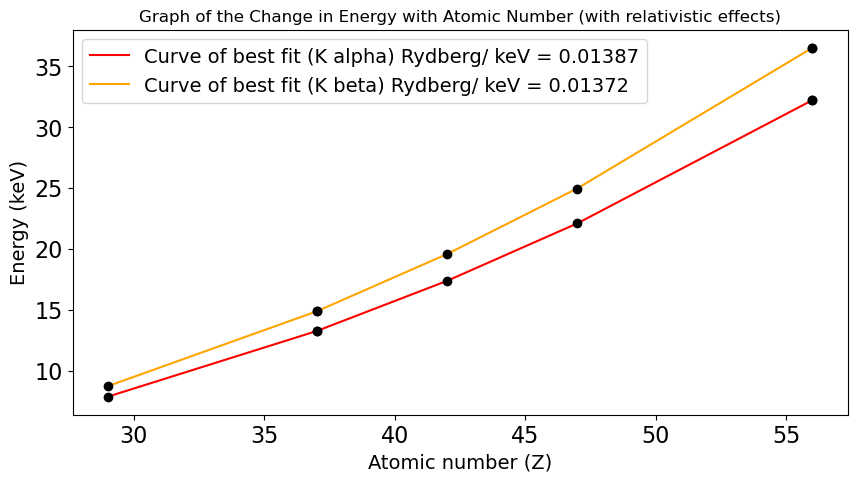

In [31]:
fig, (ax1) = plt.subplots(1, figsize=(10,5))

ax1.errorbar(Z_values, E_alpha, yerr=E_alpha_sigma, xerr=None, 
             linestyle='None', marker='o', color='black')
ax1.errorbar(Z_values, E_beta, yerr=E_beta_sigma, xerr=None, 
             linestyle='None', marker='o', color='black')
ax1.plot(Z_values, 
         mosley_law_relativisticA(outA.beta, Z_values), 
         label='Curve of best fit (K alpha) Rydberg/ keV = {:.5f}'.format(my_odr_m_A), color='red')
ax1.plot(Z_values, 
         mosley_law_relativisticB(outB.beta, Z_values), 
         label='Curve of best fit (K beta) Rydberg/ keV = {:.5f}'.format(my_odr_m_b), color='orange')
ax1.set_xlabel('Atomic number (Z)', fontsize =14), ax1.set_ylabel('Energy (keV)', fontsize =14), ax1.set_title('Graph of the Change in Energy with Atomic Number (with relativistic effects)', fontsize =12 )
ax1.legend()

#### Plotting Residuals

(Text(0.5, 0, 'Atomic Number (Z)'), Text(0, 0.5, 'Residuals of Fit (keV)'))

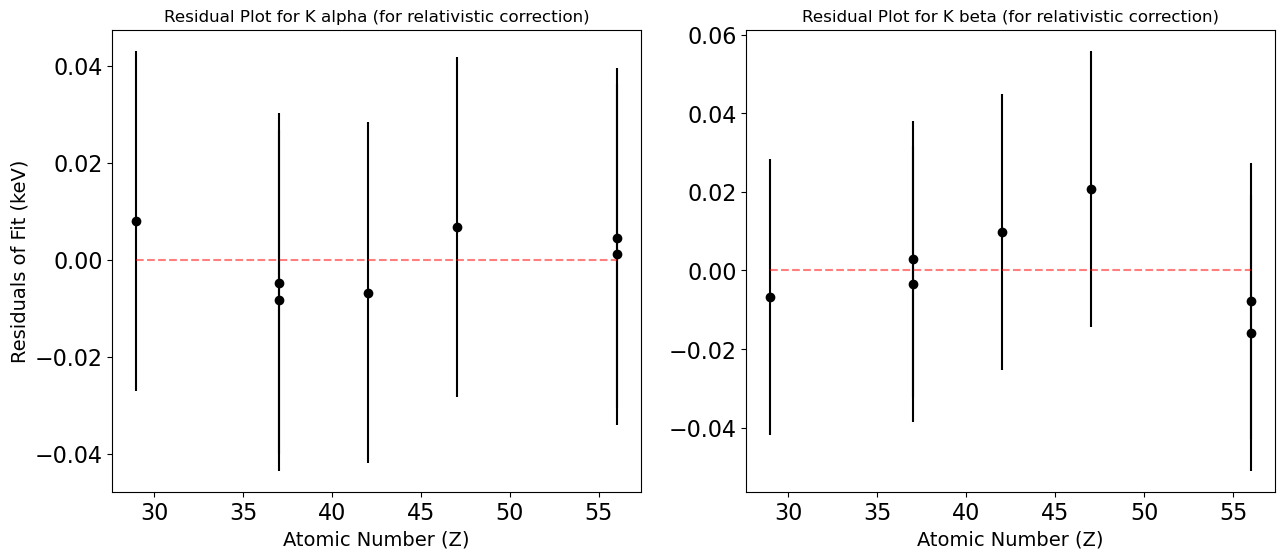

In [33]:
fig, (ax2, ax3) = plt.subplots(1,2, figsize=(15,6))
ax2.errorbar(Z_values, mosley_law_relativisticA(outA.beta, Z_values)-E_alpha, 
             yerr=E_alpha_sigma, xerr=None, linestyle='None', marker='o', color='black', label='Actual Data'), ax2.set_title('Residual Plot for K alpha (for relativistic correction)', fontsize =12 )
ax2.plot(Z_values, np.zeros(Z_values.shape), 'r--', alpha=0.5)
ax2.set_xlabel('Atomic Number (Z)', fontsize =14), ax2.set_ylabel('Residuals of Fit (KeV)', fontsize =14)

ax3.errorbar(Z_values, mosley_law_relativisticB(outB.beta, Z_values)-E_beta, 
             yerr=E_beta_sigma, xerr=None, linestyle='None', marker='o', color='black', label='Actual Data'), ax3.set_title('Residual Plot for K beta (for relativistic correction)', fontsize =12 )
ax3.plot(Z_values, np.zeros(Z_values.shape), 'r--', alpha=0.5)
ax3.set_xlabel('Atomic Number (Z)', fontsize =14), ax2.set_ylabel('Residuals of Fit (keV)', fontsize =14)

### Finding constants by using exact (literature) energy values

In [ ]:
# For Kalpha transition (use E_alpha1 = [22.163, 32.194, 8.048, 13.395, 17.479, 13.395, 32.194])
odr_modelTrueA = Model(mosley_law_relativisticA)
odr_dataTrueA = RealData(Z_values, E_alpha)
# Running model
odr_instanceTrueA = ODR(odr_dataTrueA, odr_modelTrueA, beta0=[0.10, 0.0])
outTrueA = odr_instanceTrueA.run()
# Extracting the parameters and their errors for K Alpha
my_odr_m_TA, my_odr_b_TA = outTrueA.beta

# Printing the values for K Alpha for exact energies
print("K Alpha (from Eaxct energies):")
print("My ODR fitted value of m (gradient) is {:.10f}".format(my_odr_m_TA))
print("My ODR fitted value of b (y-intercept) is {:.10f}".format(my_odr_b_TA))

# For Kbeta transition (use E_beta1 = [24.943, 36.378, 8.905, 14.961, 19.606, 14.961, 36.378])
odr_modelTrueB = Model(mosley_law_relativisticB)
odr_dataTrueB = RealData(Z_values, E_alpha)
# Running model
odr_instanceTrueB = ODR(odr_dataTrueB, odr_modelTrueB, beta0=[0.10, 0.0])
outTrueB = odr_instanceTrueB.run()
# Extracting the parameters and their errors for K Beta
my_odr_m_TB, my_odr_b_TB = outTrueB.beta

# Printing the values for K Beta for exact energies
print("K Beta (from Eaxct energies):")
print("My ODR fitted value of m (gradient) is {:.10f}".format(my_odr_m_TB))
print("My ODR fitted value of b (y-intercept) is {:.10f}".format(my_odr_b_TB))